# Exploratory Activity 10: Principal Component Analysis of Radiative Forcing Data

*adapted from [GEOG 595: Geographic Data Analysis](https://pjbartlein.github.io/GeogDataAnalysis/lec16.html) by Prof. Patrick Bartein*

Today we will use principal component analysis to examine annual changes in the radiative forcing associated with 11 environmental variables since the year 1750, as calculated in the Intergovernmental Panel on Climate Change’s [Fifth Assessment Report](http://www.ipcc-data.org/observ/index.html):

<ul>
  <li>solar activity</li>
  <li>stratospheric ozone</li>
  <li>stratospheric water vapor</li>
  <li>volcanic activity</li>
  <li>contrails</li>
  <li>tropospheric ozone</li>
 <li>total aerosol</li>
 <li>black carbon deposition on snow</li>
 <li>land use changes</li>
 <li>carbon dioxide</li>
 <li>other greenhouse gases</li>
</ul>


__10.1 Calculating Eigenvectors__

**Question 10.1.1** As you have learned, Earth's climate system contains many interdependencies and feedbacks, and thus it is useful to ascertain which environmental factors are closely correlated and which assert their own distinct forcing on the Earth's energy balance. Based on your understanding of the environmental factors provided, make a qualitative prediction about which you expect to be closely correlated and which you expect to behave in their own distinct manner.


Now we will consult the IPCC data to make a quantitative assessment of the qualitative prediction you made above. Use the code below to load and trim the radiative forcing data.


In [1]:
# import some useful libraries
from scipy.io import loadmat
import numpy as np

# load the data
data = loadmat('data/RadForcing.mat')
X = data['RadForcing']

# remove first column, which contains unnecessary year labels
X = X[:,1:]

# display the number of rows and columns in the data variable X
X.shape

(262, 11)

In [16]:
X[:,0];

You will see that the data matrix "X" contains 11 variables (as expected), with 262 observations each (as the IPCC report contains calculations through 2011). For the purposes of interpretability that will become clear later on, use the code below to invert the signs of two of these variables.

In [2]:
# invert the signs of the fourth and eleventh variables
X[:,3] = -X[:,3]
X[:,10] = -X[:,10]

**Question 10.1.2** Next, normalize the data into "standard units."

In [3]:
# create a variable the same size as the "X" data matrix
X_std = X

# iterate over all of the columns in "X"
for i in np.arange(X.shape[1]):
    
    # for each data column, substract off the mean and divide by the standard deviation
    X_std[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    
##NOTE THAT THIS METHOD ALSO CHANGES THE ORIGNIAL MATRIX X. POINT THIS OUT TO STUDENTS IF THEY USE THIS METHOD. 

**Question 10.1.3** Next, compute the covariance matrix of the normalized data matrix, defined as 𝜮 below. Here, m is the number of observations in each column and the superscript T indicates the transpose of a matrix.


<img src="https://latex.codecogs.com/svg.latex?\Large&space;\sum=\frac{1}{m}X^TX" title="" />

*Hint: You may find the functions np.transpose and np.dot useful!*

In [4]:
# calculate the covariance matrix
X_cov = (1 / X_std.shape[0]) * np.dot(np.transpose(X_std),X_std)

Finally, use the code below to run a built-in numpy function that will obtain the eigenvectors and eigenvalues of the covariance matrix:

In [5]:
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html
eigen_vals, eigen_vecs = np.linalg.eig(X_cov)

In [17]:
eigen_vals

array([8.51982864e+00, 1.07477988e+00, 9.20011242e-01, 3.91707038e-01,
       6.50157896e-02, 1.63608437e-02, 7.74967673e-03, 2.40148954e-03,
       1.44917826e-03, 1.58414356e-04, 5.37802083e-04])

In [18]:
eigen_vecs

array([[-3.39346909e-01, -5.81336786e-02,  6.15376553e-02,
        -6.77919128e-02, -2.80280589e-01,  4.64577458e-01,
         1.72551850e-01, -6.10709006e-01,  3.70755730e-01,
         1.88873875e-01, -5.30972536e-02],
       [-3.37790181e-01, -1.04499029e-01,  1.09120525e-01,
         5.71744811e-02,  1.88587216e-01,  2.15128404e-01,
        -2.85689617e-01,  9.41937656e-02,  2.13306893e-01,
        -7.91514041e-01, -1.24381821e-01],
       [-3.41522149e-01, -2.76252989e-02,  2.36379384e-03,
        -5.57803882e-02,  1.83599673e-01, -2.17139006e-01,
        -3.21621793e-01,  2.19394171e-01,  2.81009134e-01,
         4.44049894e-01, -6.09018403e-01],
       [-3.13351442e-01, -2.32727029e-01,  2.53489421e-01,
         2.56127957e-01,  5.13741684e-01,  2.73949285e-01,
         4.86521158e-01,  2.09757032e-01, -2.41065142e-01,
         1.88776092e-01,  6.60469068e-02],
       [ 3.40090619e-01,  9.18846666e-03,  3.19742173e-02,
         1.08714019e-01, -1.44487201e-01,  6.37582896e-01,
  

The output variable "eigen_vecs" above gives the "principal components" of the normalized data matrix, the axes or directions which explain the most variance in the original data set.

## 10.2 Dimensionality Reduction

While 11 eigenvectors were calculated, not all of them are equally important in explaining the variance in the data. Thus, by selecting a subset of the eigenvectors, we can reduce the dimensionality of the original data set. This raises the question: how many eigenvectors should you preserve?


**Question 10.2.1** The magnitude of the corresponding eigenvalues gives a measure of the importance of each eigenvector. Calculate the percent of the total variance explained by each eigenvector by dividing each individual eigenvalue by the sum of all the eigenvalues.


In [6]:
pct_var_explained = eigen_vals/sum(eigen_vals)

In [20]:
np.flip(np.sort(pct_var_explained))

array([7.74529877e-01, 9.77072621e-02, 8.36373856e-02, 3.56097308e-02,
       5.91052633e-03, 1.48734943e-03, 7.04516067e-04, 2.18317231e-04,
       1.31743478e-04, 4.88910984e-05, 1.44013050e-05])

In [21]:
pct_var_explained

array([7.74529877e-01, 9.77072621e-02, 8.36373856e-02, 3.56097308e-02,
       5.91052633e-03, 1.48734943e-03, 7.04516067e-04, 2.18317231e-04,
       1.31743478e-04, 4.88910984e-05, 1.44013050e-05])

**Question 10.2.2** Use the percent of the total variance explained by each eigenvector to make a plot of the "cumulative variance" explained by the first *n* eigenvectors (i.e., the percent of the total variance explained by each eigenvector plus the percentages explained by the eigenvectors before it). 

*Note: Python does not necessarily report the eigenvectors in order of importance, so it would be wise to sort the percent variance variable from highest to lowest before making the cumulative variance plot.*

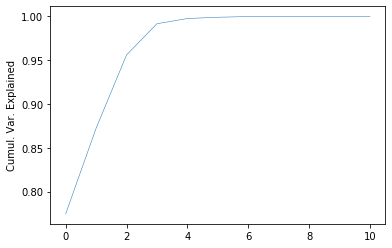

In [8]:
# sort the percent variance variable in ascending order
# then flip to obtain the desired highest-to-lowest ranking
pct_var_explained = np.flip(np.sort(pct_var_explained))

# create a list for storing cumulative variances
# use the first, largest percent variance explained as its first entry
cumul_var_explained = [pct_var_explained[0]]

# iterate over the remainder of ther percent variance variable (starting with the second entry)
for pct_var in pct_var_explained[1:]:
    
    # obtain the cumulative variance explained by all of the previous eigenvectors
    var_explained_last_time = cumul_var_explained[-1]
    
    # add to that the percent variance explained the next eigenvector
    total_var_explained_now = var_explained_last_time + pct_var
    
    # append the new cumulative variance explained to the cumul_var_explained variable
    cumul_var_explained.append(total_var_explained_now)
    
# create a subplot instance and store referenes to the figure and axis
import matplotlib.pyplot as plt
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add plots to the axis using the number of eigenvectors as the 'x'
# and the cumulative variance explained by the first x eigenvectors for the 'y'
ax.plot(np.arange(len(cumul_var_explained)),cumul_var_explained,linewidth=.5)

# add labels to the axes
plt.ylabel('Cumul. Var. Explained')

plt.show()

**Question 10.2.3** The choice of how many eigenvectors to preserve depends on the data set and your particular goals, but many data scientists choose to preserve however many principal components are necessary to explain 95-99% of the total variance. Using this criteria, how many eigenvectors should you preserve in your case?


**Question 10.2.4** Examine the principal components you've selected by printing the first n columns of your "eigen_vecs" variable below.


In [9]:
print(eigen_vecs[:,0:4])

[[-0.33934691 -0.05813368  0.06153766 -0.06779191]
 [-0.33779018 -0.10449903  0.10912052  0.05717448]
 [-0.34152215 -0.0276253   0.00236379 -0.05578039]
 [-0.31335144 -0.23272703  0.25348942  0.25612796]
 [ 0.34009062  0.00918847  0.03197422  0.10871402]
 [ 0.33271165 -0.09711291  0.14836474  0.24681329]
 [-0.34122983  0.00287767 -0.0231774  -0.07624256]
 [-0.28765554  0.2796968  -0.35468501 -0.47920588]
 [-0.29123007 -0.294361    0.37560691  0.23622556]
 [-0.2127714   0.47053413 -0.41650742  0.74301502]
 [ 0.01691625 -0.73141692 -0.67536011  0.08580074]]


## 10.3 Analyzing the Loadings of the Principal Components

By themselves, these principal components are not particularly informative. It would be useful to know how they relate to each of the environmental variables in the original data set.

To obtain this information, we "load" the magnitude of the eigenvalues onto direction indicated by the unit eigenvectors (all with lengths of 1). The resultant "loadings," calculated by the code below, describe the covariances between the original variables and the principal components.


In [10]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

**Question 10.3.1** Print the first column of the "loadings" variable to display the covariance of the first principal component with each of the 11 environmental variables.


In [22]:
print(loadings[:,0])

[-0.99051106 -0.98596716 -0.99686031 -0.91463355  0.99268185  0.97114357
 -0.99600707 -0.83963044 -0.85006404 -0.62105304  0.04937642]


**Question 10.3.2** Which environmental variables appear to be contained in this first principal component (i.e., which exhibit high covariances with the first eigenvector)? Which environmental variables seem unrelated to this principal component? Note that the environmental variables in the original data matrix you imported are not in any particular order relative to the list provided at the beginning of this activity; just refer to them by their column indices for now.


*Hint: It is the absolute value of the loading that indicates covariance; sign is unimportant.*


**Question 10.3.3** Also examine the loadings of the other principal components you decided to preserve. Which environmental variables exhibit high covariances with these eigenvectors?


In [12]:
print(loadings[:,1])

print(loadings[:,2])

print(loadings[:,3])

[-0.06026811 -0.10833581 -0.02863959 -0.24127181  0.00952583 -0.1006785
  0.00298333  0.28996612 -0.30516873  0.48781022 -0.75827156]
[ 0.05902521  0.10466537  0.00226729  0.24314     0.03066878  0.14230733
 -0.02223112 -0.34020399  0.36027169 -0.39950232 -0.64778662]
[-0.04242859  0.03578351 -0.03491099  0.16030153  0.0680403   0.15447181
 -0.04771756 -0.2999182   0.14784532  0.46502712  0.05369968]


**Question 10.3.4** Verify the conclusions of your loading analysis above by making a time series of the radiative forcing attributed to each environmental factor during the 1750-2011 time period.


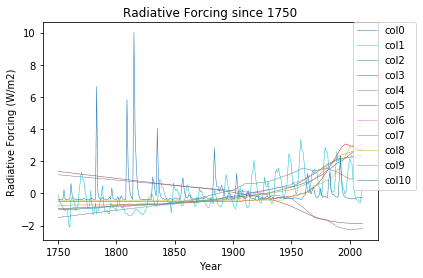

In [13]:
# create a subplot instance and store referenes to the figure and axis
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

# add plots to the axis using the years 1750-2011 as 'x' and each column of radiative forcings for the 'y'
ax.plot(np.arange(1750,2012),X[:,0],linewidth=.5,label='col0')
ax.plot(np.arange(1750,2012),X[:,1],linewidth=.5,label='col1')
ax.plot(np.arange(1750,2012),X[:,2],linewidth=.5,label='col2')
ax.plot(np.arange(1750,2012),X[:,3],linewidth=.5,label='col3')
ax.plot(np.arange(1750,2012),X[:,4],linewidth=.5,label='col4')
ax.plot(np.arange(1750,2012),X[:,5],linewidth=.5,label='col5')
ax.plot(np.arange(1750,2012),X[:,6],linewidth=.5,label='col6')
ax.plot(np.arange(1750,2012),X[:,7],linewidth=.5,label='col7')
ax.plot(np.arange(1750,2012),X[:,8],linewidth=.5,label='col8')
ax.plot(np.arange(1750,2012),X[:,9],linewidth=.5,label='col9')
ax.plot(np.arange(1750,2012),X[:,10],linewidth=.5,label='col10')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Radiative Forcing (W/m2)')
plt.title('Radiative Forcing since 1750')

# add a legend with adjusted position
fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)

plt.show()

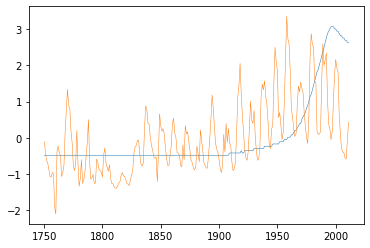

In [29]:
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')

ax.plot(np.arange(1750,2012),X[:,3],linewidth=.5,label='col3')

ax.plot(np.arange(1750,2012),X[:,9],linewidth=.5,label='col7')

plt.show()

**Question 10.3.5** Do the environmental factors that exhibited high covariances with the first principal component appear somewhat correlated over time? Do the environmental factors that exhibited low covariances with the first principal component appear uncorrelated with the other variables? Be sure to mention if there are any major discrepancies between your loadings-based conclusions and your visual analysis that cannot be easily explained.


**Discussion Questions.** Pair up with a partner and discuss the following.

1. The environmental variable names in the actual order in which they appear in the RadForcing.csv data matrix (column 0 to column 10) are: carbon dioxide, other greenhouse gases, tropospheric ozone, stratospheric ozone, total aerosol, land use changes, stratospheric water vapor, black carbon deposition on snow, contrails, volcanic activity, and solar activity.
    * Given this information, which environmental factors (by name) exhibited the highest covariance with your first principal component? Did you partner come to the same conclusion? If not, try to identify the difference(s) in your approaches that may have led to this discrepancy.
    * Do the variables associated quantitatively with your first principal component align with those you qualitatively predicted to be well correlated with one another at the beginning of this exercise? If not, explain.
    * As you know, correlation does not necessarily imply causation. Are there any environmental factors that the principal component analysis identifies as correlated that you suspect indicate temporal coincidences rather than causal relationships?
2. Make a new normalized data matrix containing only the environmental variables you expected to be well correlated in your initial qualitative prediction. Calculate the covariance matrix of this new data matrix, and then compute the eigenvalues and eigenvectors for this new covariance matrix.
    * Based on the cumulative variance explained by each subsequent principal component, how many eigenvectors would you choose to preserve in this case?
    * Is the number of principal components preserved larger or smaller than when you analyzed the entire data set? Does your answer make sense, given the criteria by which you excerpted your data matrix? 
    * What answer would you expect to get if you truncated the normalized data matrix in a different way?
3. This activity represents just one of many possible applications of principal component analysis to atmospheric science, and not even the most common one! If there is time, peruse the publications below to learn about other examples of principal component analyses in action in geophysical data exploration.
    * [Identifying Surface Climate Variations](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0442%281993%29006%3C1743%3ASCVOTN%3E2.0.CO%3B2)
    * [Characterizing CO2 Interannual Variability](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2001GL014419)
    * [Evaluating Instrument Performance](https://journals.ametsoc.org/doi/pdf/10.1175/JTECH-D-15-0085.1)